In [14]:
%matplotlib inline
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users), movies)

mean_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

mean_ratings['ratings_comb'] = (mean_ratings['M'] + mean_ratings['F']) / 2

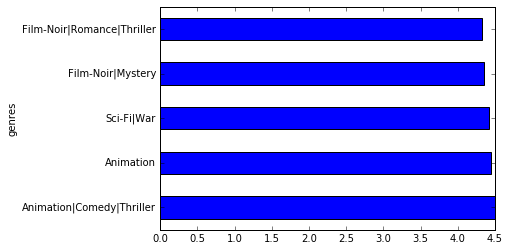

In [15]:
#1.) An aggregate of the movie ratings for each particular genre. 
sorted_by_comb = mean_ratings.sort_values(by='ratings_comb', ascending=False)
sorted_by_comb['ratings_comb'][:5].plot(kind='barh')

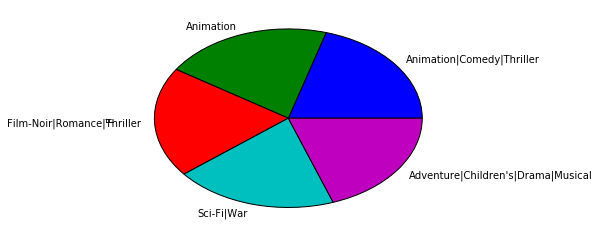

In [16]:
#2.) Top 5 Highest ranked Genre by Women
sorted_ratings_female = mean_ratings.sort_values(by='F', ascending=False)
sorted_ratings_female[0:5]['F'].plot(kind='pie')

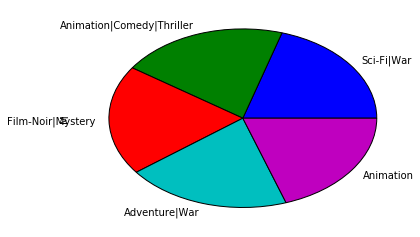

In [17]:
#3.) Top 5 Highest ranked Genre by Men
sorted_ratings_male = mean_ratings.sort_values(by='M', ascending=False)
sorted_ratings_male[0:5]['M'].plot(kind='pie')

In [18]:
#4.) A breakdown of a movie’s ratings by age, use any movie of your choice. (20 pts)
age_breakdown = data.pivot_table('rating', index='age', columns=['title','movie_id'], aggfunc='mean')
age_breakdown.ix[:,1253:1254]
#apperently, babies and old people do not enjoy Friday the 13th.

title,Friday the 13th (1980)
movie_id,1974
age,
1,2.800000
18,3.043478
25,3.090909
35,3.032258
45,3.222222
50,2.538462
56,NaN


In [19]:
#5.) A function that given a user_id and movie_id , returns a list of user_ids for users that rated the movie with the same score.
def similiar_rating_by_users(user_id, movie_id):
 ratings_by_movie_id = ratings.loc[ratings['movie_id'] == movie_id]
 user_rating_of_movies = ratings.loc[ratings['user_id'] == user_id]
 user_rating = user_rating_of_movies.loc[ratings['movie_id'] == movie_id]['rating']
 ratings_filtered_by_user = ratings_by_movie_id.loc[ratings_by_movie_id['user_id'] != user_id]
 similiar_ratings_by_users = ratings_filtered_by_user.loc[ratings_filtered_by_user['rating'] == user_rating[0]]
 return similiar_ratings_by_users[:10]

similiar_rating_by_users(1, 1193)

,user_id,movie_id,rating,timestamp
120,2,1193,5,978298413
1747,17,1193,5,978158471
2287,19,1193,5,982730936
3162,24,1193,5,978136709
4314,33,1193,5,978557765
5528,39,1193,5,978043535
7421,53,1193,5,977946400
8064,54,1193,5,977944039
8289,58,1193,5,977933866
10936,81,1193,5,977785864


In [20]:
#6 Other interesting data
# Rating of the Friday series based on gender.
# What I wanted to gather from this table was the average rating of the Friday the 13th movie franchise
#  to try and predict if the next one is going to do well, and to find a trend within the data to support that.
#  I did have trouble trying to average together the axis
data.head()
gender_rating_table = data.pivot_table('rating', index='gender', columns=['title','movie_id'], aggfunc='mean')
friday_table = gender_rating_table.ix[:,1253:1261]
pd.options.mode.chained_assignment = None 
friday_table['mean'] = friday_table.mean(axis=1)
friday_table[:]

title,Friday the 13th (1980),Friday the 13th Part 2 (1981),Friday the 13th Part 3: 3D (1982),Friday the 13th Part V: A New Beginning (1985),Friday the 13th Part VI: Jason Lives (1986),Friday the 13th Part VII: The New Blood (1988),Friday the 13th Part VIII: Jason Takes Manhattan (1989),Friday the 13th: The Final Chapter (1984),mean
movie_id,1974,1975,1976,1978,1979,1980,1981,1977,
gender,,,,,,,,,
F,2.983051,2.111111,1.758621,1.272727,1.500000,1.636364,1.444444,1.636364,1.792835
M,3.054264,2.486111,2.017647,2.165049,2.291667,2.225000,1.877778,2.258503,2.297002
